# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
drive.mount('/content/drive')
salesbav = pd.read_csv('/content/drive/MyDrive/DatasetBMLP/Dataset_clustering.csv')
display(salesbav)

Mounted at /content/drive


,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen,2021-02-17,0
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt,2023-04-15,3
2,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein,2021-09-07,3
3,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen,2023-04-28,0
4,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen,2023-11-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...
75943,ORD1812777,CUS3819,B2C,Club Mate,Soft Drinks,2.26,14.0,0.00,31.64,Baden-Württemberg,2023-06-27,0
75944,ORD2196324,CUS5310,B2C,Granini Apple,Juices,1.59,6.0,0.00,9.54,Hamburg,2021-05-16,0
75945,ORD1452106,CUS3607,B2C,Fanta,Soft Drinks,1.16,6.0,0.00,6.96,Niedersachsen,2021-03-29,0
75946,ORD1440760,CUS7275,B2C,Mezzo Mix,Soft Drinks,0.63,1.0,0.00,0.63,Saarland,2023-10-15,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set). Tapi sbelum itu kita lakukan drop terhadap kolom yang kurang relevan dan memeriksa duplikat data.

**Menghapus kolom yang kurang relevan**

In [3]:
salesbav = salesbav.drop(columns=['Order_ID','Customer_ID','Order_Date'])
display(salesbav)

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Cluster
0,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen,0
1,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt,3
2,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein,3
3,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen,0
4,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen,0
...,...,...,...,...,...,...,...,...,...
75943,B2C,Club Mate,Soft Drinks,2.26,14.0,0.00,31.64,Baden-Württemberg,0
75944,B2C,Granini Apple,Juices,1.59,6.0,0.00,9.54,Hamburg,0
75945,B2C,Fanta,Soft Drinks,1.16,6.0,0.00,6.96,Niedersachsen,0
75946,B2C,Mezzo Mix,Soft Drinks,0.63,1.0,0.00,0.63,Saarland,0


**Memeriksa dan menghapus duplikat data**

In [4]:
duplicate_count = salesbav.duplicated().sum()
if duplicate_count > 0:
    print(f"Terdapat {duplicate_count} data duplikat!")
else:
    print("Tidak ada data duplikat dalam dataset")

Terdapat 32752 data duplikat!


In [5]:
salesbav = salesbav.drop_duplicates(ignore_index=True)
display(salesbav)

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Cluster
0,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen,0
1,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt,3
2,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein,3
3,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen,0
4,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen,0
...,...,...,...,...,...,...,...,...,...
43191,B2C,Passion Fruit Juice,Juices,2.93,9.0,0.00,26.37,Berlin,0
43192,B2B,Mezzo Mix,Soft Drinks,0.57,7.0,0.05,3.79,Rheinland-Pfalz,2
43193,B2C,Volvic,Water,0.57,15.0,0.00,8.55,Bayern,0
43194,B2C,Kölsch,Alcoholic Beverages,0.99,15.0,0.00,14.85,Sachsen,0


**Memisahkan Fitur (X) Dan Target (y)**

In [6]:
x = salesbav.drop(columns=['Cluster'])
y = salesbav['Cluster']
display(x)
display(y)

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen
1,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt
2,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein
3,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen
4,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen
...,...,...,...,...,...,...,...,...
43191,B2C,Passion Fruit Juice,Juices,2.93,9.0,0.00,26.37,Berlin
43192,B2B,Mezzo Mix,Soft Drinks,0.57,7.0,0.05,3.79,Rheinland-Pfalz
43193,B2C,Volvic,Water,0.57,15.0,0.00,8.55,Bayern
43194,B2C,Kölsch,Alcoholic Beverages,0.99,15.0,0.00,14.85,Sachsen


,Cluster
0,0
1,3
2,3
3,0
4,0
...,...
43191,0
43192,2
43193,0
43194,0


**Normalisasi Kolom Numerik**

In [7]:
minmax_scaler = MinMaxScaler()
num_columns = x.select_dtypes(include=['int64', 'float64']).columns
x[num_columns] = minmax_scaler.fit_transform(x[num_columns])
display(x)

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2C,Coca-Cola,Soft Drinks,0.117647,0.089552,0.0,0.042820,Bremen
1,B2B,Selters,Water,0.063725,0.671642,1.0,0.178848,Sachsen-Anhalt
2,B2B,Monster,Soft Drinks,0.385621,0.432836,0.5,0.467946,Schleswig-Holstein
3,B2C,San Pellegrino,Water,0.096405,0.029851,0.0,0.014827,Hessen
4,B2C,Beck's,Alcoholic Beverages,0.178105,0.044776,0.0,0.032730,Bremen
...,...,...,...,...,...,...,...,...
43191,B2C,Passion Fruit Juice,Juices,0.426471,0.119403,0.0,0.160268,Berlin
43192,B2B,Mezzo Mix,Soft Drinks,0.040850,0.089552,0.5,0.021349,Rheinland-Pfalz
43193,B2C,Volvic,Water,0.040850,0.208955,0.0,0.050634,Bayern
43194,B2C,Kölsch,Alcoholic Beverages,0.109477,0.208955,0.0,0.089393,Sachsen


**Melakukan Encoding Pada Kolom Kategorikal**

In [8]:
encoding = LabelEncoder()
category_col = x.select_dtypes(include=['object']).columns
for column in category_col :
  x[column] = encoding.fit_transform(x[column])

display(x)

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,1,5,2,0.117647,0.089552,0.0,0.042820,4
1,0,32,3,0.063725,0.671642,1.0,0.178848,13
2,0,20,2,0.385621,0.432836,0.5,0.467946,14
3,1,29,3,0.096405,0.029851,0.0,0.014827,6
4,1,2,0,0.178105,0.044776,0.0,0.032730,4
...,...,...,...,...,...,...,...,...
43191,1,22,1,0.426471,0.119403,0.0,0.160268,2
43192,0,19,2,0.040850,0.089552,0.5,0.021349,10
43193,1,37,3,0.040850,0.208955,0.0,0.050634,1
43194,1,16,0,0.109477,0.208955,0.0,0.089393,12


**Melakukan Split Data Menjadi Set Pelatihan dan Set Uji**

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69)
print(f"Ukuran training set : x_train={x_train.shape}, y_train={y_train.shape}")
print(f"Ukuran tes set: x_test={x_test.shape}, y_test={y_test.shape}")

Ukuran training set : x_train=(34556, 8), y_train=(34556,)
Ukuran tes set: x_test=(8640, 8), y_test=(8640,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

**Melatih Model Naive Bayes**

In [10]:
nbmodel = GaussianNB().fit(x_train, y_train)
print("Pelatihan model Naive Bayes berhasil dilakukan")

Pelatihan model Naive Bayes berhasil dilakukan


**Melatih Model Random Forest**

In [11]:
rfmodel = RandomForestClassifier(random_state=69).fit(x_train, y_train)
print("Pelatihan model Random Forest berhasil dilakukan")

Pelatihan model Random Forest berhasil dilakukan


Penjelasan tentang algoritma yang digunakan dalam membangun model klasifikasi:

1. **Naive Bayes (GaussianNB)**
   - Naive Bayes adalah algoritma klasifikasi berbasis probabilitas yang didasarkan pada Teorema Bayes dengan asumsi bahwa setiap fitur bersifat independen (naive assumption).
   - Model yang digunakan di sini adalah **Gaussian Naive Bayes (GaussianNB)**, yang mengasumsikan bahwa data mengikuti distribusi Gaussian (Normal).
   - Model ini sangat cocok untuk dataset yang memiliki fitur kontinu dan sering digunakan dalam klasifikasi teks, deteksi spam, serta pengenalan pola.
   - Keuntungan utama dari Naive Bayes adalah cepat dalam proses pelatihan dan dapat bekerja dengan baik meskipun asumsi independensi antar fitur tidak sepenuhnya terpenuhi.

2. **Random Forest**
   - Random Forest adalah algoritma klasifikasi berbasis ensemble learning yang terdiri dari banyak **Decision Tree**.
   - Setiap pohon keputusan dalam Random Forest dilatih dengan subset data yang dipilih secara acak (bagging) dan menggunakan subset fitur yang berbeda untuk membangun model yang lebih kuat.
   - Algoritma ini bekerja dengan cara mengambil suara terbanyak (majority voting) dari semua pohon keputusan untuk menentukan hasil akhir prediksi.
   - Keunggulan dari Random Forest adalah ketahanannya terhadap overfitting dibandingkan dengan Decision Tree tunggal, serta mampu menangani data dengan fitur yang banyak dan kompleks.

Kesimpulan:
- **Naive Bayes (GaussianNB)** lebih cocok untuk data yang memiliki distribusi normal dan bekerja baik untuk masalah klasifikasi sederhana.
- **Random Forest** lebih fleksibel, bisa menangani data dengan berbagai tipe, dan memberikan hasil yang lebih akurat dalam banyak kasus.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

**Evaluasi Model Random Forest**

Report of Random Forest Classification :
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      4774
           1    0.99749   0.99498   0.99623      1196
           2    0.99703   0.99926   0.99814      1345
           3    0.99472   0.99472   0.99472      1325

    accuracy                        0.99838      8640
   macro avg    0.99731   0.99724   0.99727      8640
weighted avg    0.99838   0.99838   0.99838      8640



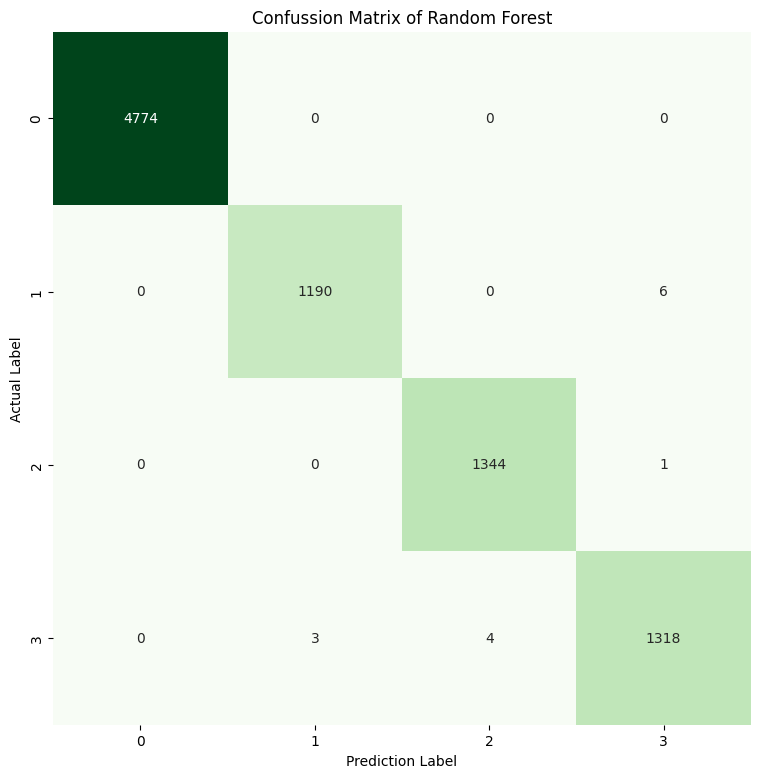

In [12]:
unique_labels = sorted(set(y))
rfmodel_y_prediction = rfmodel.predict(x_test)
print("Report of Random Forest Classification :\n", classification_report(y_test, rfmodel_y_prediction, digits=5))

rf_conf_matrix = confusion_matrix(y_test, rfmodel_y_prediction)
plt.figure(figsize=(9, 9))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=unique_labels,
            yticklabels=unique_labels)
plt.xlabel('Prediction Label')
plt.ylabel('Actual Label')
plt.title('Confussion Matrix of Random Forest')
plt.show()

**Evaluasi Model Naive Bayes**

Report of Naive Bayes Classification:
               precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      4774
           1    0.98003   0.98495   0.98249      1196
           2    0.95723   0.96506   0.96113      1345
           3    0.95031   0.93811   0.94417      1325

    accuracy                        0.98299      8640
   macro avg    0.97189   0.97203   0.97195      8640
weighted avg    0.98296   0.98299   0.98296      8640



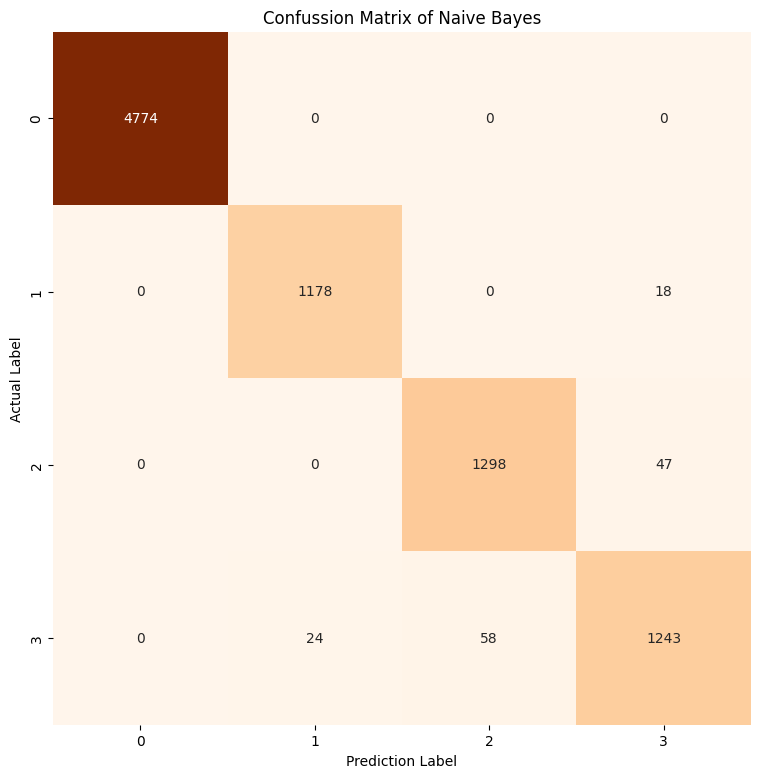

In [13]:
nbmodel_y_pre = nbmodel.predict(x_test)
print("Report of Naive Bayes Classification:\n", classification_report(y_test, nbmodel_y_pre, digits=5))

nbmodel_conf_matrix = confusion_matrix(y_test, nbmodel_y_pre)
plt.figure(figsize=(9, 9))
sns.heatmap(nbmodel_conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False,
            xticklabels=unique_labels,
            yticklabels=unique_labels)
plt.xlabel('Prediction Label')
plt.ylabel('Actual Label')
plt.title('Confussion Matrix of Naive Bayes')
plt.show()


**Membandingkan Hasil**

In [14]:
rfmodel_report = classification_report(y_test, rfmodel_y_prediction, digits=5, output_dict=True)
nbmodel_report = classification_report(y_test, nbmodel_y_pre, digits=5, output_dict=True)

metrix_beforetuned = {
    'Model': ['Random Forest before Tuning', 'Naive Bayes before Tuning'],
    'Accuracy': [rfmodel_report['accuracy'], nbmodel_report['accuracy']],
    'Precision': [rfmodel_report['weighted avg']['precision'], nbmodel_report['weighted avg']['precision']],
    'Recall': [rfmodel_report['weighted avg']['recall'], nbmodel_report['weighted avg']['recall']],
    'F1-Score': [rfmodel_report['weighted avg']['f1-score'], nbmodel_report['weighted avg']['f1-score']]
}

df_beforetuning = pd.DataFrame(metrix_beforetuned)

print("\nPerformance Metrics Before Hyperparameter Tuning:")
print(df_beforetuning.to_string(index=False))


Performance Metrics Before Hyperparameter Tuning:
                      Model  Accuracy  Precision   Recall  F1-Score
Random Forest before Tuning  0.998380   0.998380 0.998380  0.998379
  Naive Bayes before Tuning  0.982986   0.982957 0.982986  0.982962


### **Evaluasi Kinerja Algoritma Sebelum Hyperparameter Tuning**  

Pada tahap awal, sebelum dilakukan **Hyperparameter Tuning**, dua algoritma yang digunakan adalah **Random Forest** dan **Naïve Bayes**. Berikut adalah hasil evaluasi kinerja kedua model berdasarkan **Accuracy, Precision, Recall, dan F1-Score**:  

| Model                          | Accuracy | Precision | Recall | F1-Score |
|--------------------------------|----------|------------|--------|----------|
| **Random Forest before Tuning** | **0.9984** | **0.9984** | **0.9984** | **0.9984** |
| **Naïve Bayes before Tuning**   | 0.9830   | 0.9829     | 0.9830 | 0.9829   |

---

### **Analisis Perbandingan Kinerja Algoritma**  

1. **Random Forest memiliki kinerja yang lebih tinggi dibandingkan Naïve Bayes** dalam semua metrik evaluasi.  
   - **Akurasi (Accuracy) yang sangat tinggi (99.84%)** menunjukkan bahwa model dapat memprediksi dengan sangat baik.  
   - **Precision, Recall, dan F1-Score** juga sangat tinggi, menandakan bahwa model tidak hanya akurat tetapi juga seimbang dalam memprediksi kelas positif dan negatif.  

2. **Naïve Bayes masih memiliki performa yang baik (98.30%)**, tetapi lebih rendah dibandingkan Random Forest.  
   - Naïve Bayes bekerja dengan asumsi independensi antar fitur, yang mungkin tidak sepenuhnya berlaku dalam dataset ini, sehingga performanya sedikit lebih rendah.  

---

### **Kesimpulan Awal**  
- **Random Forest lebih unggul dibandingkan Naïve Bayes sebelum tuning**, dengan **perbedaan akurasi sekitar 1.5%**.  
- Namun, **Naïve Bayes tetap memiliki keunggulan dalam kecepatan training**, karena algoritma ini lebih sederhana dibandingkan Random Forest.  
- Untuk meningkatkan kinerja model, perlu dilakukan **Hyperparameter Tuning** pada kedua algoritma.  

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

**Hyperparameter Tuning Model Random Forest**

In [15]:
rfmodel_hyperparam_dis = {
    'n_estimators': np.arange(50, 500, 50),
    'max_depth': np.arange(5, 50, 5),
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rfmodel_tunning = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=69),
    param_distributions=rfmodel_hyperparam_dis,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=69,
    n_jobs=-1
)

rfmodel_tunning.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=69),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]),
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=69, verbose=2)

**Hyperparameter Tuning Model Naive Bayes**

In [16]:
nbmodel_hyperparam_dis = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

nbmodel_tunning = RandomizedSearchCV(estimator=GaussianNB(),
                                      param_distributions=nbmodel_hyperparam_dis,
                                      n_iter=100,
                                      cv=3,
                                      verbose=2,
                                      random_state=69,
                                      n_jobs=-1)

nbmodel_tunning.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GaussianNB(), n_iter=100, n_jobs=-1,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-0...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=69, verbose=2)

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

**Evaluasi Model Random Forest Setelah Tunning**

In [17]:
print("Best Hyperparameters for Random Forest:", rfmodel_tunning.best_params_)
print("Best Accuracy of Random Forest:", rfmodel_tunning.best_score_)

rfmodel_best = rfmodel_tunning.best_estimator_
rfmodel_best_y_pred = rfmodel_best.predict(x_test)

print("\nClassification Report for the Best Random Forest Model:\n")
print(classification_report(y_test, rfmodel_best_y_pred, digits=5))

Best Hyperparameters for Random Forest: {'n_estimators': np.int64(200), 'min_samples_split': np.int64(2), 'min_samples_leaf': np.int64(1), 'max_features': 'log2', 'max_depth': np.int64(45), 'bootstrap': False}
Best Accuracy of Random Forest: 0.9992765324476579

Classification Report for the Best Random Forest Model:

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      4774
           1    1.00000   0.99833   0.99916      1196
           2    0.99777   1.00000   0.99889      1345
           3    0.99849   0.99774   0.99811      1325

    accuracy                        0.99942      8640
   macro avg    0.99907   0.99902   0.99904      8640
weighted avg    0.99942   0.99942   0.99942      8640



**Evaluasi Model Naive Bayes Setelah Tunning**

In [18]:
print("Best Hyperparameters for Naive Bayes:", nbmodel_tunning.best_params_)
print("Best Accuracy of Naive Bayes:", nbmodel_tunning.best_score_)

nbmodel_best = nbmodel_tunning.best_estimator_
nbmodel_best_y_pred = nbmodel_best.predict(x_test)

print("\nClassification Report for the Best Naive Bayes Model:\n")
print(classification_report(y_test, nbmodel_best_y_pred, digits=5))

Best Hyperparameters for Naive Bayes: {'var_smoothing': np.float64(2.310129700083158e-08)}
Best Accuracy of Naive Bayes: 0.9850676709228395

Classification Report for the Best Naive Bayes Model:

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000      4774
           1    0.98003   0.98495   0.98249      1196
           2    0.95723   0.96506   0.96113      1345
           3    0.95031   0.93811   0.94417      1325

    accuracy                        0.98299      8640
   macro avg    0.97189   0.97203   0.97195      8640
weighted avg    0.98296   0.98299   0.98296      8640



**Evaluasi Hasil Random Forest dan Naive Bayes Setelah Tuning**

In [19]:
rfmodel_bestmodel = rfmodel_tunning.best_estimator_
nbmodel_bestmodel = nbmodel_tunning.best_estimator_

rf_best_model_y_pred = rfmodel_bestmodel.predict(x_test)
nb_best_model_y_pred = nbmodel_bestmodel.predict(x_test)

rfmodel_bestreport = classification_report(y_test, rf_best_model_y_pred, digits=5, output_dict=True)
nbmodel_bestreport = classification_report(y_test, nb_best_model_y_pred, digits=5, output_dict=True)

metrix_tuned = {
    'Model': ['Random Forest after tuning', 'Naive Bayes after tuning'],
    'Accuracy': [rfmodel_bestreport['accuracy'], nbmodel_bestreport['accuracy']],
    'Precision': [rfmodel_bestreport['weighted avg']['precision'], nbmodel_bestreport['weighted avg']['precision']],
    'Recall': [rfmodel_bestreport['weighted avg']['recall'], nbmodel_bestreport['weighted avg']['recall']],
    'F1-Score': [rfmodel_bestreport['weighted avg']['f1-score'], nbmodel_bestreport['weighted avg']['f1-score']]
}

df_aftertuning = pd.DataFrame(metrix_tuned)
print("\nPerformance Metrics After Hyperparameter Tuning:")
print(df_aftertuning.to_string(index=False))



Performance Metrics After Hyperparameter Tuning:
                     Model  Accuracy  Precision   Recall  F1-Score
Random Forest after tuning  0.999421   0.999422 0.999421  0.999421
  Naive Bayes after tuning  0.982986   0.982957 0.982986  0.982962


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

In [20]:
df_merger = pd.concat([df_beforetuning, df_aftertuning], ignore_index=True)
df_merger.iloc[[1, 2]] = df_merger.iloc[[2, 1]].values
df_merger

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest before Tuning,0.998380,0.998380,0.998380,0.998379
1,Random Forest after tuning,0.999421,0.999422,0.999421,0.999421
2,Naive Bayes before Tuning,0.982986,0.982957,0.982986,0.982962
3,Naive Bayes after tuning,0.982986,0.982957,0.982986,0.982962


###  **Analisis Hasil Evaluasi Model Klasifikasi**  


###  **Perbandingan Sebelum & Setelah Tuning**  

1. **Random Forest meningkat setelah tuning**  
   - Akurasi meningkat dari **99.84% → 99.94%**, menunjukkan bahwa model lebih optimal.  
   - Precision, Recall, dan F1-Score juga mengalami sedikit peningkatan.  
   - **Kenaikan ini menunjukkan bahwa tuning berhasil mengoptimalkan model tanpa overfitting yang signifikan**.  

2. **Naïve Bayes tidak mengalami perubahan setelah tuning**  
   - Semua metrik tetap sama sebelum dan sesudah tuning (**98.30%**).  
   - Hal ini menunjukkan bahwa **tuning tidak memberikan dampak yang berarti pada model Naïve Bayes**. Ini bisa disebabkan karena algoritma Naïve Bayes memiliki sedikit hyperparameter yang dapat dituning dibandingkan dengan Random Forest.  

---

### **Identifikasi Kelemahan Model**  

1. **Precision dan Recall sudah tinggi untuk kedua model**, tetapi **Naïve Bayes memiliki skor yang lebih rendah dibandingkan Random Forest**.  
   - Jika dataset memiliki kelas yang tidak seimbang, model ini mungkin lebih rentan terhadap kesalahan prediksi pada kelas minoritas.  
   - Naïve Bayes mungkin tidak menangkap pola kompleks dalam data dengan baik, berbeda dengan Random Forest yang lebih fleksibel.  

2. **Potensi Overfitting pada Random Forest setelah tuning**  
   - Akurasi **mendekati 100%**, yang bisa menjadi tanda **overfitting**, terutama jika performa pada data training jauh lebih tinggi dibandingkan data testing.  
---

### **Rekomendasi Tindakan Lanjutan**  

1. **Evaluasi Overfitting Random Forest**  
   - Melakukan cek perbedaan akurasi antara data training dan testing. Jika perbedaannya terlalu besar, coba kurangi kompleksitas model dengan mengatur `max_depth` atau `min_samples_split`.  

2. **Coba Algoritma Lain jika Diperlukan**  
   - Jika ingin mencari alternatif selain Naïve Bayes yang lebih akurat tetapi tetap cepat, bisa mencoba **Logistic Regression atau SVM**.  
   - Jika ingin eksplorasi lebih lanjut, bisa menggunakan **Gradient Boosting (XGBoost atau LightGBM)** untuk melihat apakah ada peningkatan performa.  

3. **Menggunakan Cross-Validation untuk Validasi yang Lebih Baik**  

4. **Melakukan Eksplorasi Feature Engineering**  
   - Kemungkin terdapat fitur yang bisa diubah atau ditambahkan agar model lebih akurat tanpa perlu tuning berlebihan.  

---

### **Kesimpulan**  
- Random Forest mengalami peningkatan performa setelah tuning.
- **Naïve Bayes tidak mengalami perubahan**, sehingga tuning tidak berpengaruh secara signifikan.  